In [1]:
from simple_nn.nn import NeuralNetwork
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

# load the MNIST dataset
print("[INFO] loading MNIST (sample) dataset...")
digits = datasets.load_digits()
data = digits.data.astype("float")
data = (data - data.min()) / (data.max() - data.min())
print("[INFO] samples: {}, dim: {}".format(data.shape[0], data.shape[1]))

# split the data
(trainX, testX, trainY, testY) = train_test_split(data, digits.target, test_size=0.25)
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

# train the network
print("[INFO] training network...")
nn = NeuralNetwork([trainX.shape[1], 32, 16, 10])
print("[INFO] {}".format(nn))
nn.fit(trainX, trainY, epochs=1000)

# evaluate the network
print("[INFO] evaluating network...")
predictions = nn.predict(testX)
predictions = predictions.argmax(axis=1)
print(classification_report(testY.argmax(axis=1), predictions))


[INFO] loading MNIST (sample) dataset...
[INFO] samples: 1797, dim: 64
[INFO] training network...
[INFO] NeuralNetwork: 64-32-16-10
[INFO] epoch=1, loss=604.9110703
[INFO] epoch=100, loss=5.9181659
[INFO] epoch=200, loss=3.2762204
[INFO] epoch=300, loss=1.3202132
[INFO] epoch=400, loss=0.9114534
[INFO] epoch=500, loss=0.7868188
[INFO] epoch=600, loss=0.7195427
[INFO] epoch=700, loss=0.6772771
[INFO] epoch=800, loss=0.6482893
[INFO] epoch=900, loss=0.6272035
[INFO] epoch=1000, loss=0.6111984
[INFO] evaluating network...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.87      1.00      0.93        41
           2       0.98      1.00      0.99        46
           3       0.96      0.98      0.97        46
           4       0.96      1.00      0.98        50
           5       0.96      0.92      0.94        49
           6       1.00      0.97      0.99        40
           7       1.00      1.00      1.0

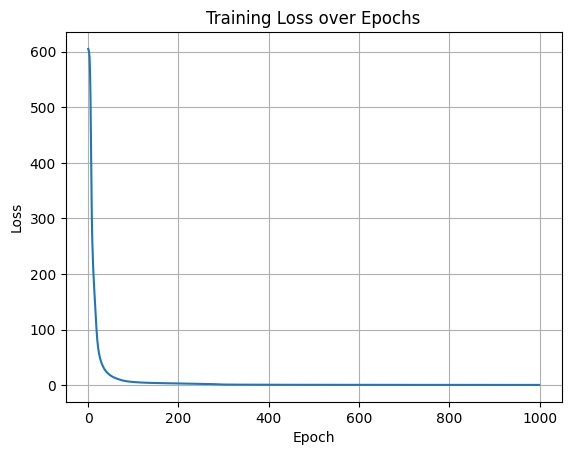

In [2]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(nn.loss_history)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
